In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline



#help('read_csv')

df_day=pd.read_csv("C:\\Users\\PUNEET SINGH\\BIKE_RENTAL.csv")

#Print the `head` of the data
df_day.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
#understanding of data
df_day.shape
#It contains (731, 16)

df_day.describe()

#df_day.info()

#data  consist of Integers , Float  and Object(categorical) variables 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


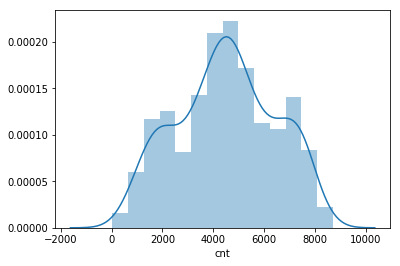

In [3]:

##################################################### Univariate Analysis##########################################
# Target variable  analysis

#descriptive statistics summary
df_day['cnt'].describe()

#Check whether target variable is normal or not
sns.distplot(df_day['cnt']);




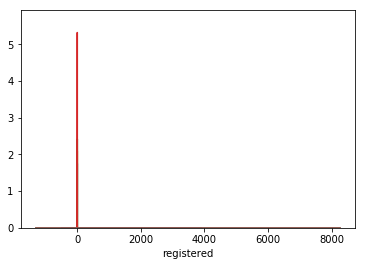

In [4]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

#Check whether  variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['hum']);

#Check whether  variable 'windspeed'is normal or not
sns.distplot(df_day['windspeed']);


#Check whether  variable 'casual'is normal or not
sns.distplot(df_day['casual']);



#Check whether  variable 'registered'is normal or not
sns.distplot(df_day['registered']);


# it is clearly showing that chances of outliers present in  'casual' varible

In [5]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


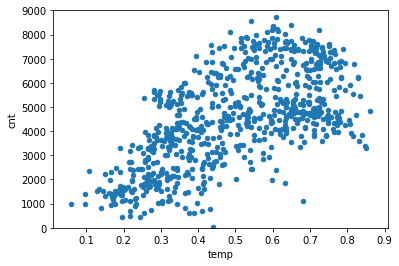

In [6]:
######################################### Bivariate  Relationship #####################################################
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'


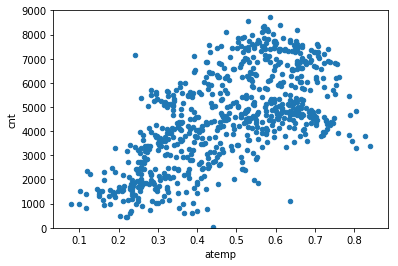

In [7]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df_day['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'


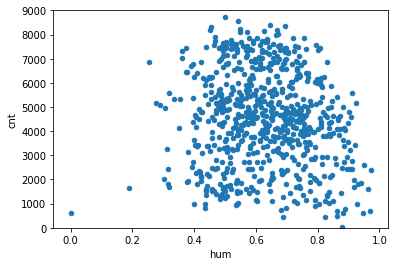

In [8]:
#relation between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'



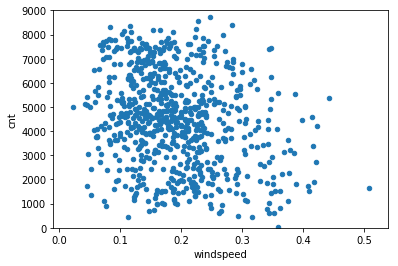

In [9]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'




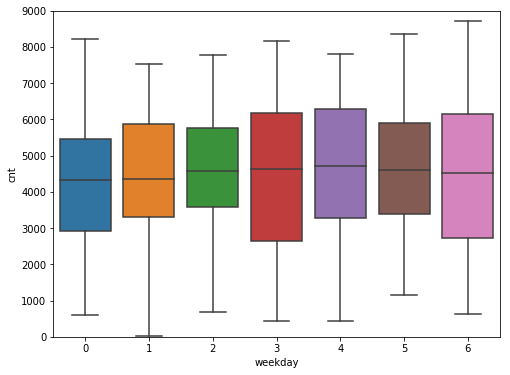

In [10]:

#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000  

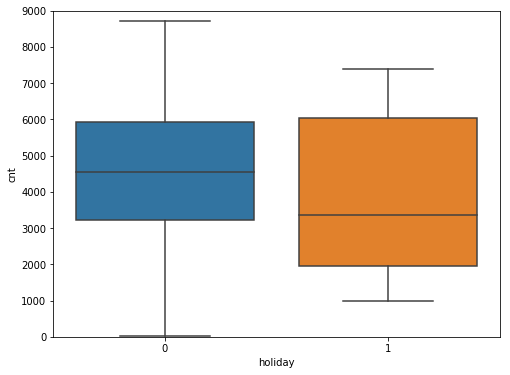

In [11]:

#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [12]:
##########################################   missing  values ##############################################
#total_missing_values = df_day.isnull().sum().sort_values(ascending=False)
#total_missing_value

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


In [13]:
#Already all numeric variable  are in normalize form so  , we are not analysing  Outliers   here

#here the  six  numerics variables are present  out of six four variables are in normalize form , 
#  temp,atem,hum,windspread  are in  normalize form  no need to check outliers

#casual and registered  have to check outliers

df_day_1 =  df_day.copy()


0.6728044333386831

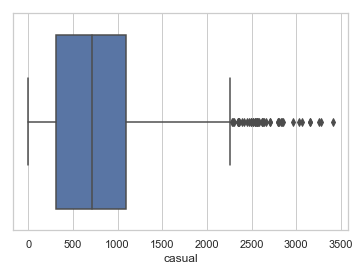

In [14]:
######################################### Outlier Analysis ##########

df_day.head()

#plt.boxplot(df_day_1['casual'])

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day['casual'],orient ='h')

#It seems Outliers are present  in  'Casual' variable  but we are keeping as it is , will detect and  conver outliers  during tuning 
#process

# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])



-855.25
2266.75


0.6460020508747333

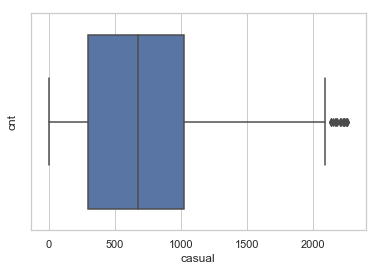

In [15]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

df_day_out = df_day.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

# Boxplot for casual after  a outlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')

# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])


In [16]:
############################################# feature  selection   #######################################
df_day.head()
#Selection of numerical feature  based  on pearson corelation 

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
#day_numeric.shape


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)



,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


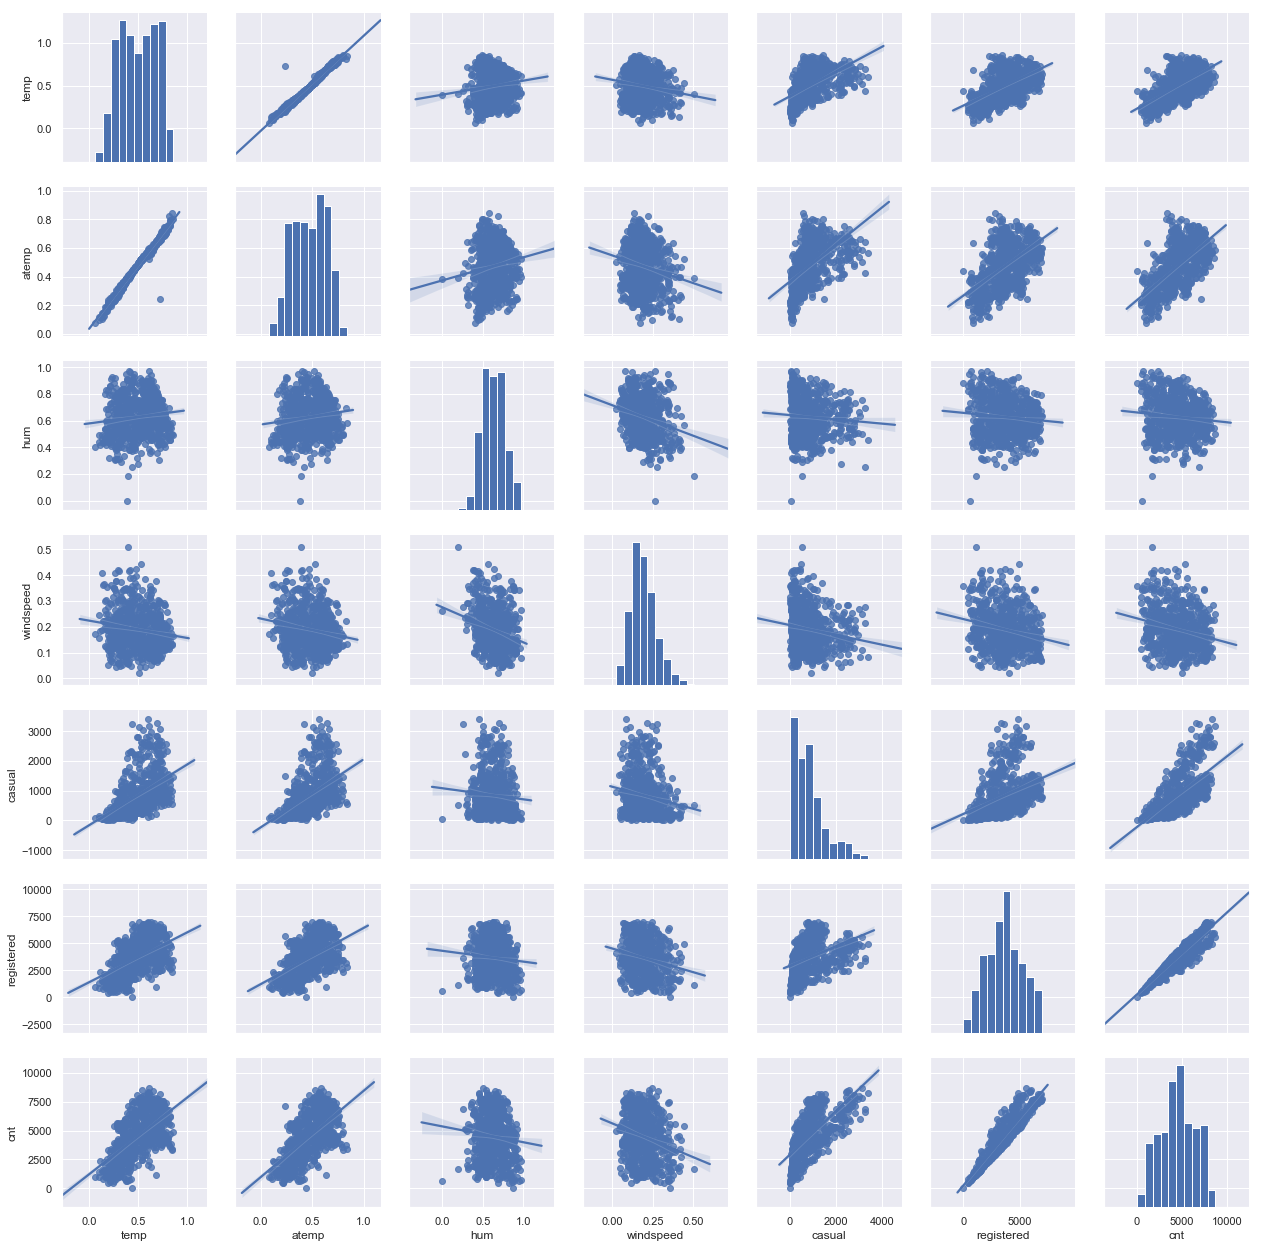

(731, 5)

In [17]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show();

#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

numeric_features.shape


In [18]:
#diividing  Test and train data  using skilearn   train_test_split 

df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)
df_day_feature_selection.shape

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_day_feature_selection, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
489,490,2012-05-04,2,1,5,0,5,1,1,0.627500,0.162938,1069,5227,6296
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.184700,95,2273,2368
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,0.342046,327,3767,4094
288,289,2011-10-16,4,0,10,0,0,0,1,0.511667,0.281717,1748,3293,5041
221,222,2011-08-10,3,0,8,0,3,1,1,0.766667,0.200258,884,3896,4780


In [19]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)



#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predition   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
[4128. 4763. 7446. 1977. 6436. 6879. 4068. 5259. 4401. 4978. 6196. 1341.
 4484. 2077. 3068. 3606. 7504. 4150. 7335. 5169.  431. 7429. 4274. 1865.
  985. 6192. 3194. 4169. 2227. 3249. 4169. 4118. 7446. 6118. 7175. 6824.
 7442. 3190. 5260. 6196. 4634. 4191. 5020. 3894. 1865. 5138. 1623. 4492.
 3272. 5668. 5743. 5099. 2227. 8090. 2765. 2423. 4120. 3811. 1301. 4401.
 3767. 4694. 6685. 5805. 5362. 3542. 1406. 3777. 6192. 5312. 1623. 5255.
 4318. 7290. 2765. 3820. 7458. 2227. 4826. 6889. 2294. 4744. 2298. 2832.
 1812. 1526. 4549. 2485.  605. 5572. 7836. 1606. 7458. 6544. 6879. 5423.
 7335. 5035. 3669. 3620. 3831. 5315. 6565. 4352. 4274. 5531. 7836. 5698.
 5267. 7359. 3709. 2843. 1248.

In [20]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

# Error  is getting  "3.9060877364738893"

3.4347076925085824

In [21]:

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split =4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

#Now error is getting  '4.179783397343639'

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
[4123.9        4823.45454545 7479.52631579 1962.         6418.66666667
 6918.38461538 4123.9        5302.57142857 4467.         4985.5
 6121.         1321.         4647.33333333 2100.         3158.5
 3639.33333333 7479.52631579 4094.66666667 7479.52631579 4792.33333333
  459.33333333 7430.         4300.         1825.2         952.5
 6352.5        3190.33333333 4169.         2424.         3158.5
 4169.         3902.33333333 7479.52631579 6171.14285714 7191.
 6855.         7479.52631579 3191.         5188.875      6121.
 4658.1875     4647.33333333 4823.45454545 4123.9        1825.2
 5583.         1650.33333333 4335.68421053 3329.11111111 5785.6
 5656.71428571 4985.5        2269.       

3.891512413287755

In [22]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse=np.sqrt(MSE)
print(rmse)

    


7486472.935230654
50928.38731449424
225.67318696401273


In [23]:

def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

#MAPE 
MAPE(test_target_feature,predictions_DT_two)

#MAPE : 3.87
#RMSE

RMSE(test_target_feature,predictions_DT_two)

#236.4154868419363


Mean Square :  50928.38731449424
Root Mean Square :  225.67318696401273


225.67318696401273

In [24]:
#************************************ Random Forest ************************************************
#here  same features are taking  what we took for the Decision Tree
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#train_features_one

# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test_feature)

#print(RF_predict)



In [25]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

#Error rate is 1.9177308818184

#Here it is stating accuracy of the model increases

2.0679907044103776

In [26]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_one)

#RMSE =  111.62161584579938

Mean Square :  15479.752285659864
Root Mean Square :  124.41765262879646


124.41765262879646

In [27]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression feature ordering
mir_result
#feature_scores = []
#for i in np.arange(len(train)):
#    feature_scores.append([train_variables_one_1[i],mir_result[i]])
#sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
#print(np.array(sorted_scores))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0.22441896, 0.25579782, 0.37562893, 0.        , 0.04034998,
       0.06628682, 0.39855732, 0.05749019, 0.68594448, 1.69301234])

In [28]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(pair)) for pair in feature_importances]


[0.00022118098519972952, 0.0009661018848454044, 0.0006542522490763309, 2.166069625160327e-05, 0.0004728114515714414, 0.00014479486343440664, 0.0015234145770553534, 0.0008516192159009469, 0.08706793972354336, 0.9080762243531215]


In [29]:

train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.2244189593828141
yr = 0.2557978166468118
mnth = 0.375628927501106
holiday = 0.0
weekday = 0.040349983327636174
weathersit = 0.06628681935084257
temp = 0.3985573185575131
windspeed = 0.05749018523566907
casual = 0.6859444750045718
registered = 1.6930123447193677


In [30]:
train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]

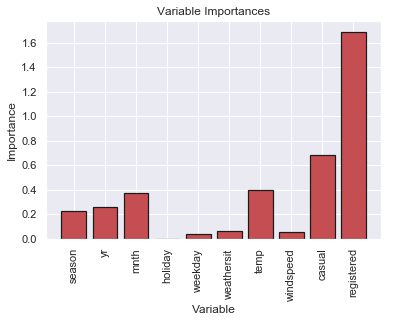

In [31]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [32]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)
#rf_exp.fit(train_features, train_labels)

#print(RF_model)
# Predict the model using predict funtion

RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


[4139.496 4717.19  7359.376 1919.628 6579.182 6945.794 4045.262 5473.966
 4467.744 4960.792 6260.308 1375.538 4300.33  1951.168 3185.126 3616.406
 7494.874 4015.298 7387.866 5163.296  604.336 7450.78  4364.94  1845.612
  881.808 6305.964 3202.546 4406.116 2141.51  3142.256 4593.774 4013.1
 7378.358 6107.092 7163.178 7028.05  7443.162 3212.86  5329.748 6176.432
 4599.178 4788.292 5110.662 3923.75  1870.074 5867.246 1638.448 4372.312
 3301.044 5685.624 5070.358 5122.788 2268.37  7582.168 2908.312 2430.204
 4083.222 3885.346 1331.656 4357.114 3874.532 4786.972 6727.068 5687.588
 4877.352 3581.756 1416.786 3754.244 6139.852 5227.396 1513.134 5246.386
 4452.896 7368.372 2767.512 3962.808 7477.284 2172.33  4827.108 6831.632
 2381.13  4830.64  2288.702 2755.242 1841.664 1608.608 4625.984 2354.676
  661.41  5502.268 7599.576 1730.31  7521.396 6599.498 7069.648 5015.166
 7517.124 5183.196 3647.004 3581.34  3796.312 5551.314 6529.82  4297.518
 4329.016 5638.096 7269.824 5598.45  5347.756 7435.34

In [33]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

#Error rate is 1.9276505612329415

#Here it is stating accuracy of the model increases slightly

2.046388714054243

In [34]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)

#RMSE = 99.92744529077154


# Accuracy and  RMSE is improved  

Mean Square :  15122.967864925175
Root Mean Square :  122.97547668102439


122.97547668102439

In [35]:
############################################# Linear Regression ############################
#here  same features are taking  what we took for the Linear Regression
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#test_target_feature

#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

#Summary of model
linear_regression_model.summary()

#predict the  model

predict_LR = linear_regression_model.predict(test_feature)

print(predict_LR)


[4109. 4687. 7261. 1834. 6572. 7001. 3974. 5499. 4521. 5058. 6227. 1349.
 4381. 1969. 3351. 3717. 7580. 3873. 7375. 5511.  754. 7498. 4458. 1815.
 1013. 6233. 3053. 4367. 2192. 3117. 4569. 4066. 7216. 6235. 7273. 7109.
 7415. 3243. 5298. 6169. 4570. 4758. 5130. 3907. 1851. 5976. 1589. 4433.
 3333. 5686. 5102. 5115. 2302. 7865. 2947. 2395. 4127. 3867. 1263. 4359.
 3855. 4803. 6824. 5923. 4905. 3644. 1421. 3740. 6230. 5225. 1472. 5464.
 4460. 7384. 2660. 3785. 7460. 2210. 4795. 6969. 2402. 4881. 2236. 2743.
 2252. 1562. 4672. 2429.  627. 5478. 8294. 1712. 7702. 6598. 7040. 5117.
 7697. 5087. 3641. 3523. 3784. 5382. 6421. 4378. 4334. 5687. 7410. 5501.
 5170. 7444. 3750. 2710. 1204. 3005. 1416. 7347. 6591. 4308. 5084. 7264.
 6825. 4258. 7424. 7736. 4665. 4509. 4679. 5312. 7058. 6043. 7713. 5532.
 4390. 6140. 4475. 5345.  623. 1917. 3544. 3956. 1005. 5107. 3387. 3204.
 2132. 6370. 3747.]


In [36]:
#evaluate model using MAPE

MAPE(test_target_feature,predict_LR)
#MAPE  is  0.108

#Predict the model using  RMSE

RMSE(test_target_feature,predict_LR)

#RMSE  is  '3.9'

#it is  showing that  Linear Regression model is  best suitable for the dataset

Mean Square :  5.349945356359123e-24
Root Mean Square :  2.3129948889608735e-12


2.3129948889608735e-12

In [37]:
MAPE(test_target_feature,predict_LR)

5.373411591558996e-14

In [38]:
# COnclusion  Linear regression is the  best model for the dataset

In [39]:
# Saving the best Model 
# Saving the Logistic Regression Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_39.obj","wb")
# saving the model in pickel string
saved_lg_model = pickle.dump(linear_regression_model,filehandler)
filehandler.close()